# Part 1: perceptron with mini-batch SGD

In [2]:
import numpy as np

np.random.seed(941)

N = 250

X1_1 = np.random.normal(loc=0.5, scale=1.5, size=N)
X1_2 = np.random.normal(loc=5.4, scale=0.5, size=N)

X2_1 = np.random.poisson(lam=1.5, size=N)
X2_2 = np.random.exponential(scale=2, size=N)

X0 = np.ones(N * 2)

X1 = np.concatenate([X1_1, X1_2])
X2 = np.concatenate([X2_1, X2_2])
X = np.stack([X0, X1, X2], axis=1)

y1 = np.ones(N)
y2 = np.ones(N) * -1
y = np.concatenate([y1, y2])

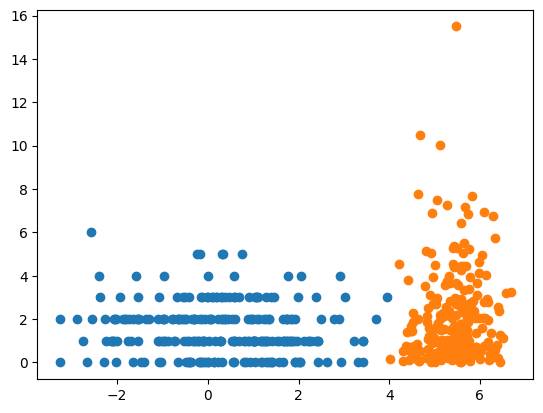

In [3]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)
plt.show()

In [4]:
# mini batch sgd

w = np.random.normal(loc=0, size=3)

eta=1e-4
batch_size = 20
max_epochs = 500
errors_epoch = np.zeros(max_epochs)

for epoch in range(max_epochs):
  errors_epoch[epoch] = sum((y * np.sign(np.dot(X, w))) < 0)

  rand_perm = np.random.permutation(range(y.shape[0]))
  X = X[rand_perm, :]
  y = y[rand_perm]

  for i in range(0, y.shape[0], batch_size):
    X_batch = X[i:i+batch_size, :]
    y_batch = y[i:i+batch_size]

    errors = y_batch - np.dot(X_batch, w)
    w = w + eta * np.dot(X_batch.T, errors)

  errors_epoch[epoch] = sum((y * np.sign(np.dot(X, w))) < 0)

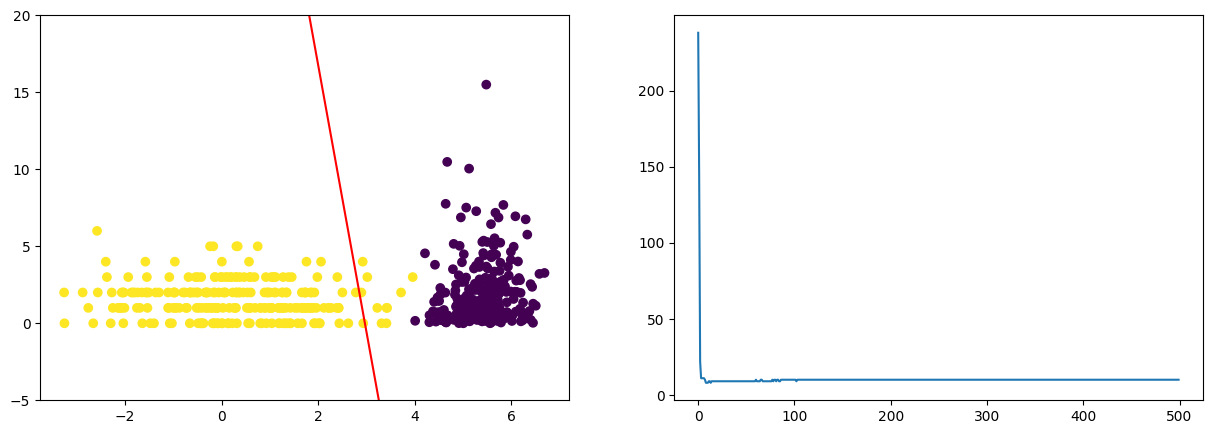

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
axs[0].scatter(X[:, 1], X[:, 2], c=y)
axs[0].plot([np.min(X[:, 1]), np.max(X[:, 1])], [np.min(X[:, 1]) * (-w[1]/w[2]) - w[0]/w[2], np.max(X[:, 1]) * (-w[1]/w[2]) - w[0]/w[2]], c= "red")
axs[0].set_ylim(-5, 20) 
axs[1].plot(range(max_epochs), errors_epoch)

# Part 2: regression

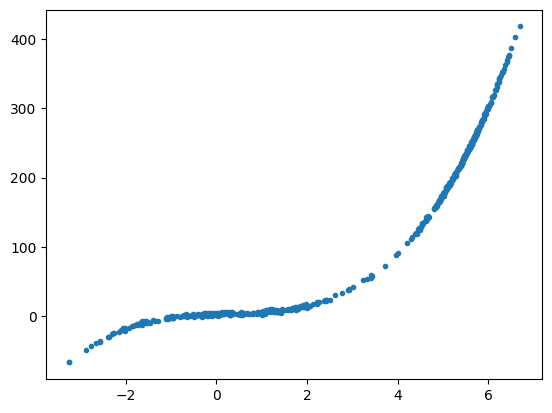

In [12]:
noise = np.random.normal(loc=0, scale=1.5, size=(2 * N))
X = X1
y = 1.5 * X**3 - X**2 + 2 * X + 3 + noise

X0 = np.ones(2 * N)
data_matrix = np.stack((X0, X, X**2, X**3), axis=1)

plt.plot(X, y, ".")

[ 3.16288345  2.21422001 -1.05716731  1.50185784]


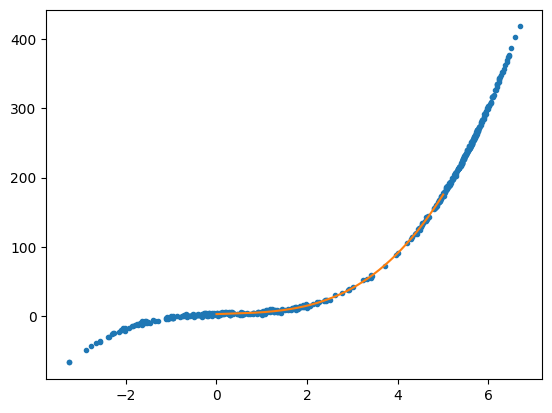

In [18]:
w = np.dot(np.linalg.inv(np.dot(data_matrix.T, data_matrix)), np.dot(data_matrix.T, y))
print(f"{w}")

# generate grid of points
x_grid = np.linspace(0, 5, 2 * N)

# plot line
plt.plot(X, y, ".")
plt.plot(x_grid, w[0] + x_grid * w[1] + x_grid**2 * w[2] + x_grid**3 * w[3])